In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/clean/trip.csv')
df.head()

,household_id,person_id,trip_id,sequential_trip_id,time_at_destination,trip_duration_minutes,num_people_on_trip,num_non_household_members_on_trip,num_household_members_on_trip,parking_cost,...,vehicle_id,vehicle_type,minutes_walked_from_parking,who_drove,who_drove_imputed,reason_for_travel,reason_for_travel_to,why_trip,trip_purpose_old_schema,worker_status
0,9000013002,1,1,1,75,15,2,0,2,-1.0,...,NaN,"SUV (Santa Fe, Tahoe, Jeep, etc.)",1 to less than 5 minutes,Person 1,Person 1,Regular activities at home,Recreational activities,Social/Recreational,Other Social/Recreational,Not worker
1,9000013002,1,2,2,-9,10,2,0,2,-1.0,...,NaN,"SUV (Santa Fe, Tahoe, Jeep, etc.)",0 minutes/ parked in the same building,Person 1,Person 1,Recreational activities,Regular activities at home,Home,Other Social/Recreational,Not worker
2,9000013002,2,1,1,10,30,1,0,1,-1.0,...,NaN,"SUV (Santa Fe, Tahoe, Jeep, etc.)",Valid skip,Person 2,Person 2,Regular activities at home,Buy meals,Meals,Other Social/Recreational,Worker
3,9000013002,2,2,2,10,10,1,0,1,-1.0,...,NaN,"SUV (Santa Fe, Tahoe, Jeep, etc.)",Not ascertained,Person 2,Person 2,Buy meals,Buy meals,Meals,Other Social/Recreational,Worker
4,9000013002,2,3,3,-9,30,1,0,1,-1.0,...,NaN,"SUV (Santa Fe, Tahoe, Jeep, etc.)",Not ascertained,Person 2,Person 2,Buy meals,Regular activities at home,Home,Other Social/Recreational,Worker


In [3]:
df.columns

Index(['household_id', 'person_id', 'trip_id', 'sequential_trip_id',
       'time_at_destination', 'trip_duration_minutes', 'num_people_on_trip',
       'num_non_household_members_on_trip', 'num_household_members_on_trip',
       'parking_cost', 'trip_miles', 'trip_weight_7_day', 'trip_weight_5_day',
       'trip_weight_2_day', 'trip_case_id', 'vehicle_miles_traveled',
       'gas_price_at_travel_time', 'num_adults_in_household',
       'num_drivers_in_household', 'household_size',
       'num_vehicles_in_household', 'travel_day_date', 'WRKCOUNT',
       'household_stratum_id', 'respondent_age', 'household_grouping',
       'census_division', 'census_region', 'DRIVER', 'driver_flag',
       'education_level', 'end_trip_time', 'started_travel_at_home',
       'household_income', 'household_income_imputed', 'drove_on_trip',
       'hispanic', 'race', 'own_or_rent_home', 'LIF_CYC', 'loop_trip',
       'metro_area_category', 'metro_area_size', 'person_1_on_trip',
       'person_10_on_trip'

In [4]:
df['vehicle_miles_traveled'].value_counts()

vehicle_miles_traveled
-1.000000     10584
 0.000000        14
 2.058421        11
 0.937228         9
 1.376631         9
              ...  
 7.525792         1
 4.882536         1
 7.469857         1
 20.970168        1
 0.257303         1
Name: count, Length: 13760, dtype: int64

Dataset preparation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

columns_to_keep = ['time_at_destination', 'trip_duration_minutes', 'num_people_on_trip',
                   'num_non_household_members_on_trip', 'num_household_members_on_trip',
                   'trip_miles', 'num_adults_in_household',
                   'num_drivers_in_household', 'household_size',
                   'num_vehicles_in_household', 'WRKCOUNT',
                   'respondent_age', 'DRIVER',
                   'education_level', 'started_travel_at_home',
                   'own_or_rent_home', 'LIF_CYC', 'loop_trip',
                   'respondent_sex_imputed', 'weekend_trip', 'vehicle_used_on_trip', 
                   'trip_mode', 'trip_purpose']

df1 = df[columns_to_keep]

X = df1.iloc[:, 0:-1]
y = df1.iloc[:, -1]

X = pd.get_dummies(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([7714.,    0., 6884.,    0., 4546.,    0., 4871.,    0., 7035.,
          24.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

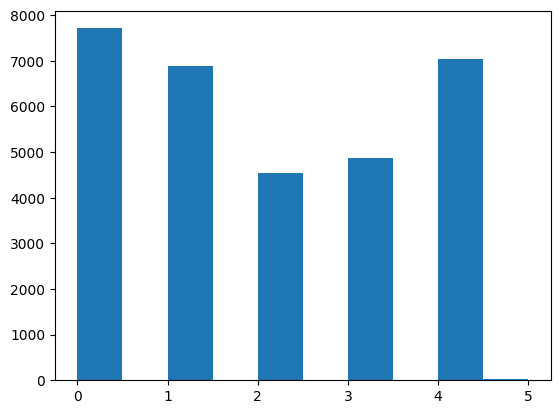

In [36]:
import matplotlib.pyplot as plt
plt.hist(y)

Try random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Perform cross-validation with stratified sampling
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Results:")
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

# Fit and make predictions on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the classification report and cross-validation results
print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-Validation Results:
Accuracy: 0.59 (+/- 0.01)
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      1482
           1       0.56      0.60      0.58      1378
           2       0.67      0.49      0.57       917
           3       0.67      0.77      0.72       978
           4       0.57      0.58      0.57      1453
           5       1.00      0.29      0.44         7

    accuracy                           0.61      6215
   macro avg       0.68      0.56      0.58      6215
weighted avg       0.61      0.61      0.61      6215



In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Build the Gradient Boosting model
model_gb = GradientBoostingClassifier(n_estimators=100, max_depth=30, random_state=42)

# Perform cross-validation with stratified sampling
# cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
# scores = cross_val_score(model_gb, X_train, y_train, cv=cv, scoring='accuracy')

# print("Cross-Validation Results:")
# print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

# Fit and make predictions on the test set
model_gb.fit(X_train, y_train)
y_pred = model_gb.predict(X_test)

# Print the classification report and cross-validation results
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1482
           1       0.54      0.55      0.55      1378
           2       0.53      0.49      0.51       917
           3       0.61      0.66      0.63       978
           4       0.55      0.53      0.54      1453
           5       0.33      0.43      0.38         7

    accuracy                           0.56      6215
   macro avg       0.52      0.54      0.53      6215
weighted avg       0.56      0.56      0.56      6215



Hyper parameter tuning for xgboost

In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize XGBoost classifier
model = xgb.XGBClassifier()

# Perform Grid Search
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1482
           1       0.60      0.62      0.61      1378
           2       0.67      0.52      0.59       917
           3       0.68      0.79      0.73       978
           4       0.59      0.63      0.61      1453
           5       1.00      0.29      0.44         7

    accuracy                           0.63      6215
   macro avg       0.70      0.58      0.60      6215
weighted avg       0.63      0.63      0.63      6215



In [37]:
best_params

{'subsample': 0.6,
 'n_estimators': 300,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 1.0}